# Installation

In this tutorial we show how to install OpenSBT and execute a dummy AEB system in a simplified simulator.

The installation has been tested with Ubuntu 22.04 and Python 3.8. It is recommended having installed git.

Using git we first download the OpenSBT repo. When you want to install OpenSBT independent of this tutorial, you need first to open a terminal in the folder where you want to install OpenSBT and clone the repository via (the "!" is only required if statement is executed in this jupyter notebook)


In [2]:
!git clone --branch extract-examples https://git.fortiss.org/opensbt/opensbt-core.git

Cloning into 'opensbt-core'...


Now you need to switch to the OpenSBT folder via:

In [3]:
cd opensbt-core

C:\Users\Lev\Documents\fortiss\projects\testing\open-sbt\opensbt-core\docs\jupyter\opensbt-core


Then install all dependencies of OpenSBT with the following commands (installation might take some seconds, as libraries need to be downloaded).


In [4]:
!pip install -r requirements.txt 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Testing Installation

We can now test the installation of OpenSBT by running our first experiment: Testing a simplified Automated Emergency Braking system in avoiding a collision with a pedestrian. The experiment is already defined in OpenSBT in the file called `default_experiments.py` and has the name "5". Note, that this is a very simplified system and is only for explaining the usage of OpenSBT.

_Note: Only linear motion planning, no comprehensive vehicles dynamics or environmental simulation is used. This system is just for testing the installation of OpenSBT._

Then we can start then the experiment by its name:

In [6]:
!python run.py -e 5

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      4 |             - |             -
     2 |      100 |      5 |  0.1176972168 |             f
     3 |      150 |      5 |  0.0151242433 |             f
     4 |      200 |      3 |  0.1816633031 |         ideal
     5 |      250 |      4 |  0.6348719031 |         nadir
     6 |      300 |      5 |  0.2561106398 |         ideal
     7 |      350 |      5 |  0.0537440729 |             f
     8 |      400 |      5 |  0.0055977362 |         ideal
     9 |      450 |      6 |  0.0528119162 |         ideal
    10 |      500 |      9 |  0.1361364127 |         ideal
    11 |      550 |      9 |  0.1031513836 |         nadir
    12 |      600 |      9 |  0.0040232072 |         ideal
    13 |      650 |      8 |  0.0709640633 |             f
    14 |      700 |     10 |  0.5061633827 |         ideal
    15 |      750 |      8 |  0.1208927737 |         ideal
    16 |      800 |      8 |  0.1026809217 |            

2024-02-02 16:23:23,947 INFO     Logging setup. Writing to file:  .\log.txt
2024-02-02 16:23:23,947 INFO     Selected experiment: 5
2024-02-02 16:23:23,947 INFO     Pymoo NSGA-II algorithm is used.
2024-02-02 16:23:23,957 INFO     Running evaluation number 1
2024-02-02 16:23:24,194 INFO     Running evaluation number 2
2024-02-02 16:23:24,477 INFO     Running evaluation number 3
2024-02-02 16:23:24,713 INFO     Running evaluation number 4
2024-02-02 16:23:25,053 INFO     Running evaluation number 5
2024-02-02 16:23:25,292 INFO     Running evaluation number 6
2024-02-02 16:23:25,541 INFO     Running evaluation number 7
2024-02-02 16:23:25,827 INFO     Running evaluation number 8
2024-02-02 16:23:26,092 INFO     Running evaluation number 9
2024-02-02 16:23:26,357 INFO     Running evaluation number 10
2024-02-02 16:23:26,753 INFO     Running evaluation number 11
2024-02-02 16:23:27,003 INFO     Running evaluation number 12
2024-02-02 16:23:27,253 INFO     Running evaluation number 13
2024-

We can now inspect the created result artefacts which are located in the results folder. We can directly observe them from this jupyter notebook:

In [ ]:
import pandas as pd
from pathlib import Path
import os

exp_folder = os.getcwd() + f"/results/DummySimulatorProblem/NSGA2/"
paths = sorted(Path(exp_folder).iterdir(), key=os.path.getmtime)
results_path = str(paths[-1])
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

In [9]:
import pandas as pd
import os
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

     Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0        0        69.392590      1.091959       244.077658      1.979254   
1        1        69.392590      1.091959       244.077658      1.979254   
2        2        69.392590      1.091959       244.077658      1.979254   
3        3        69.392590      1.091959       244.077658      1.979254   
4        4        69.053437      2.804679       244.018327      2.882576   
..     ...              ...           ...              ...           ...   
445    445        69.379089      2.997228       245.196667      2.248922   
446    446        69.345893      2.999754       244.156595      2.210575   
447    447        69.346652      2.999747       245.266074      2.894023   
448    448        69.148634      2.999750       245.257144      2.214020   
449    449        69.340851      2.999754       243.961340      2.214010   

     Fitness_Min distance  Fitness_Velocity at min distance  
0                0.233762

Further, we can inspect the visualization of the scenarios (yellow: ego vehicle, red: pedestrian). In the follow ing output, scenarios which are considered as fitness-optimal are shown. The visualization supports illustration of multiple actors.

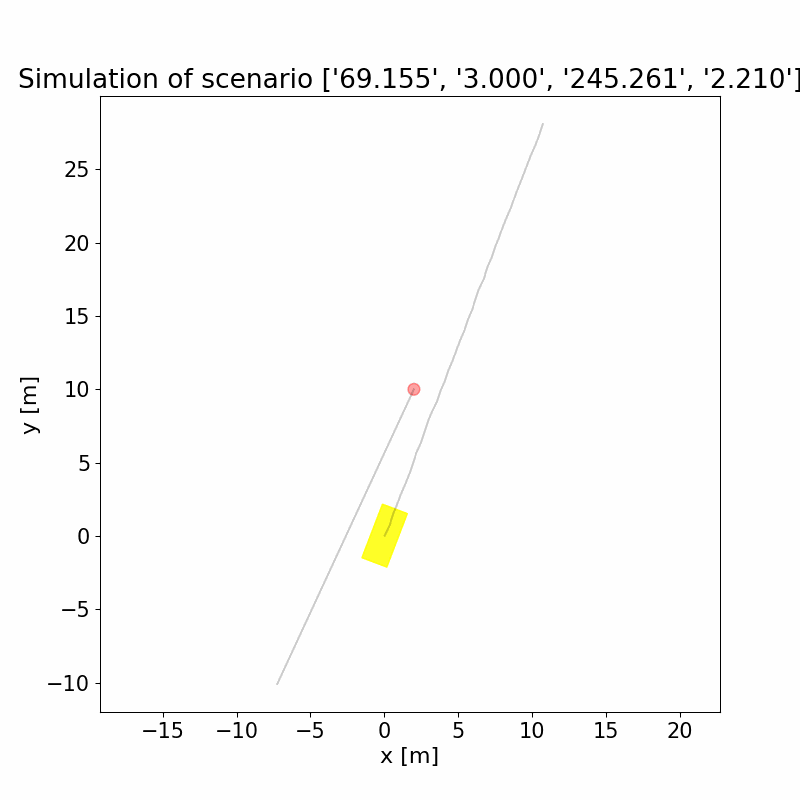

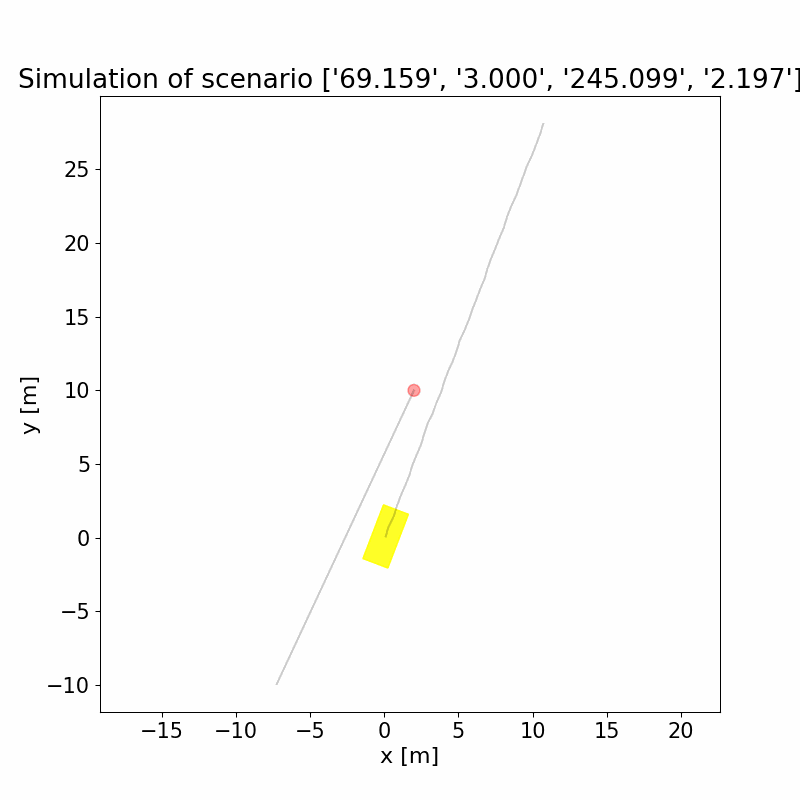

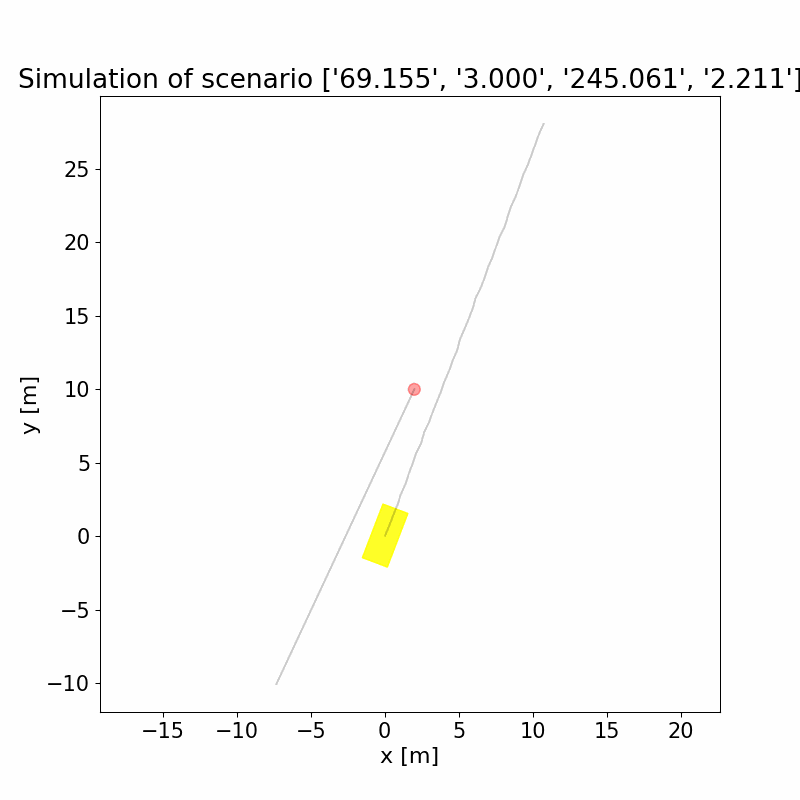

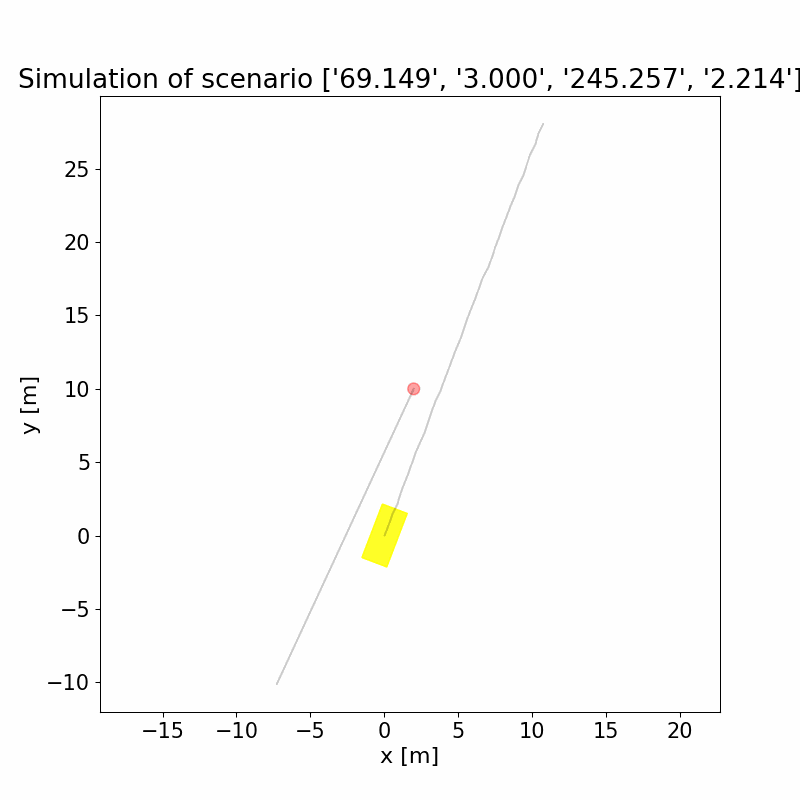

In [10]:
from IPython.display import Image
import os
n = 4 # show max n images
folder_gifs = results_path + os.sep + "gif"
i = 0
for f in os.listdir(folder_gifs):
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and i < n:
      img = Image(open(fpath,'rb').read(), width=300, height=300)
      display(img)
      i = i+1

We can also inspect pair-wise test input space plots which are generated for all test cases encountered during search. 

Purple boxes depict intervals in the search space where the SUT is assumed to be critical. These regions are identified by Decision Tree learning. Note, that a region is only considered as critical when the ratio between critical and all tests inside that region is above a threshold (i.e., 0.5). The threshold can be adapted in the code.

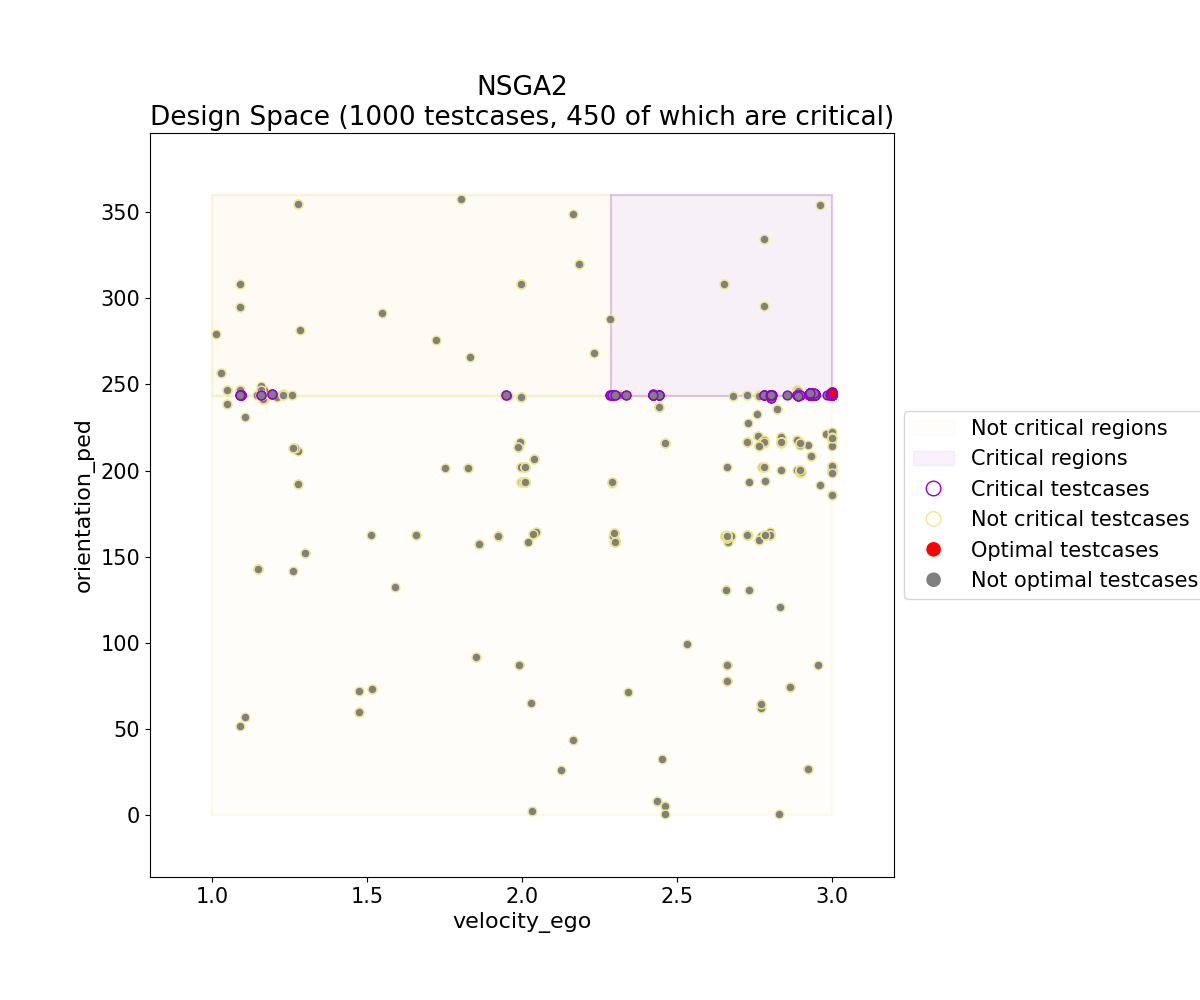

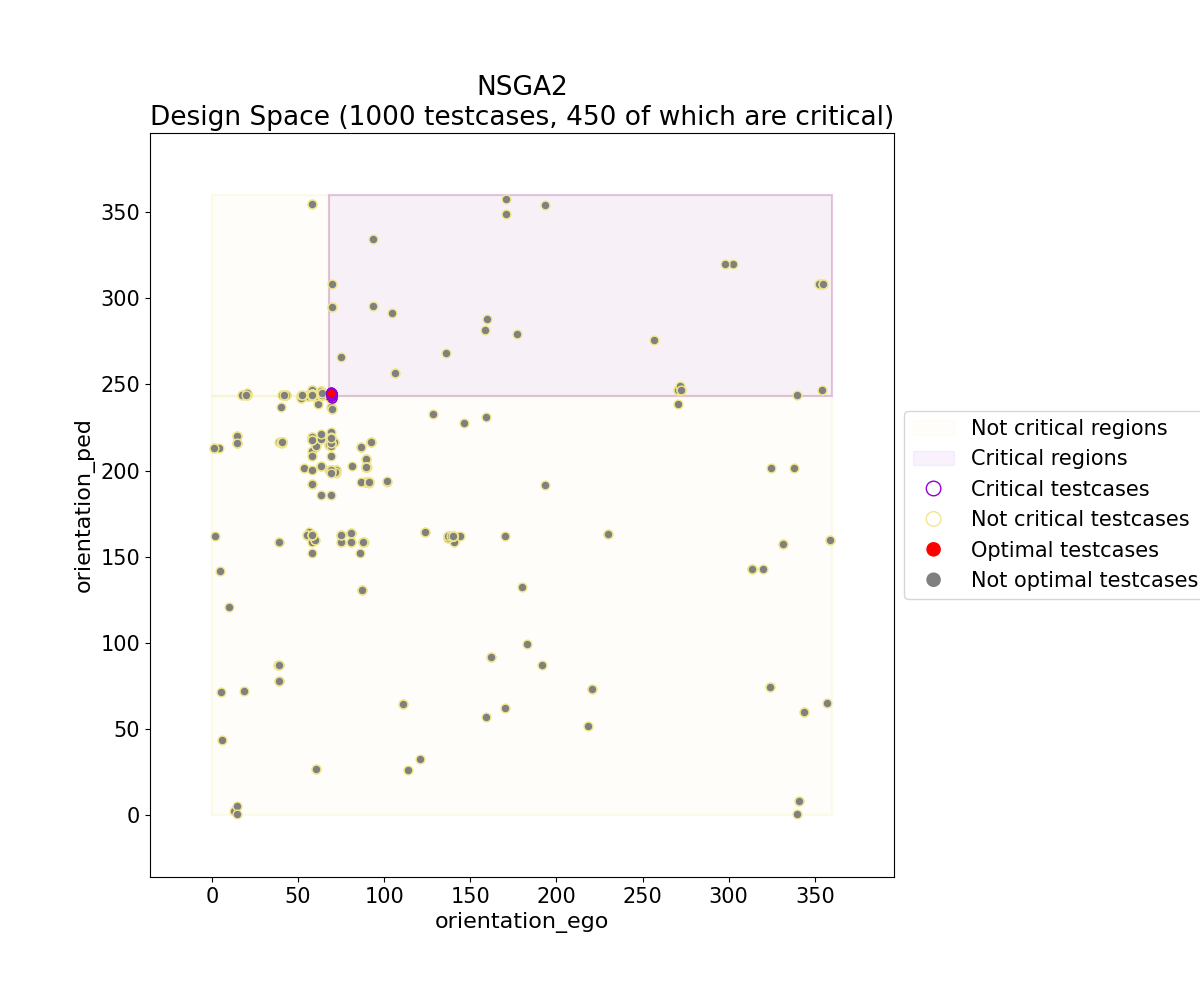

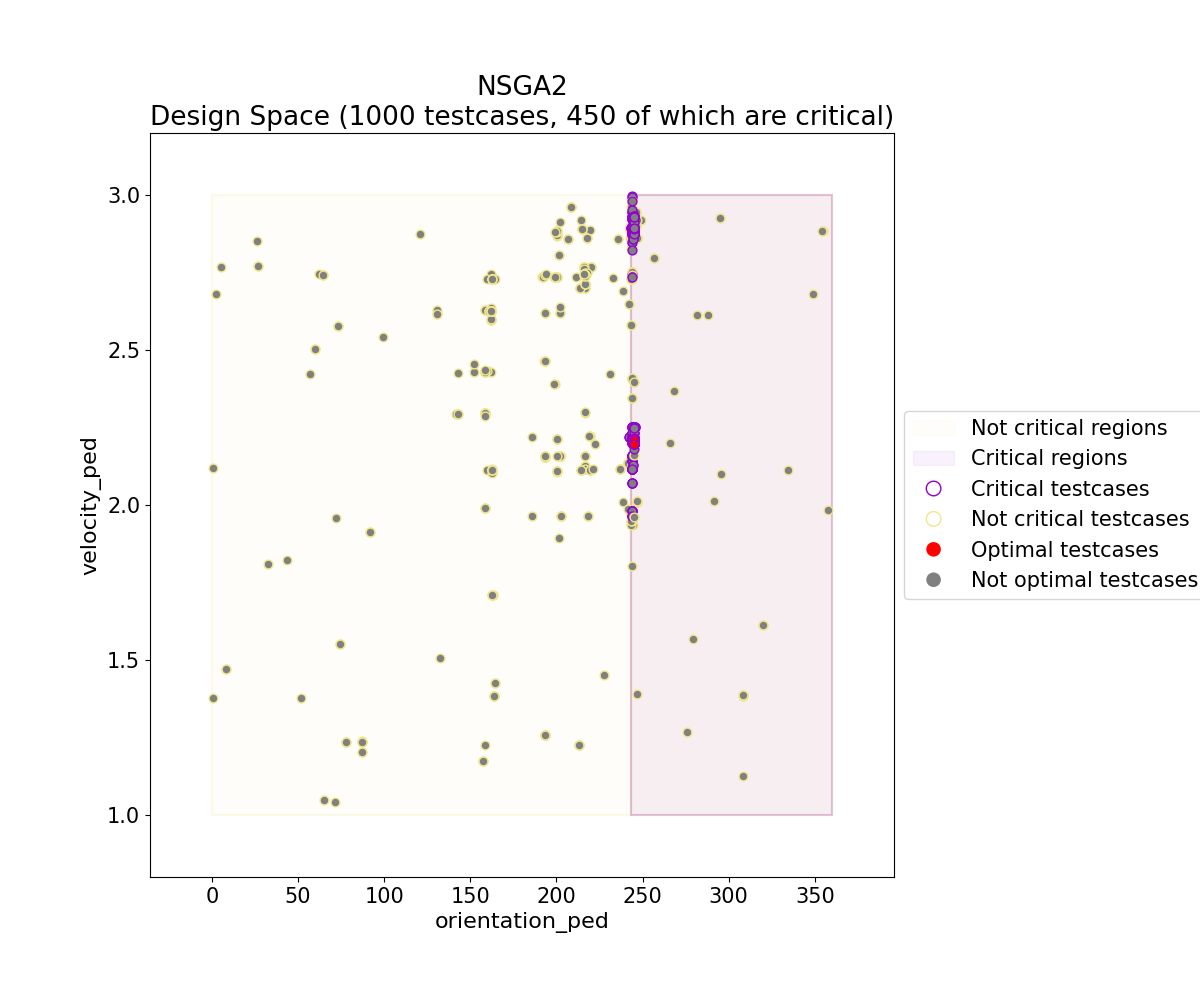

In [11]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "design_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1

Also we can inspect plots that visualize the fitness values of all evaluated test inputs, which critical and non-critical.


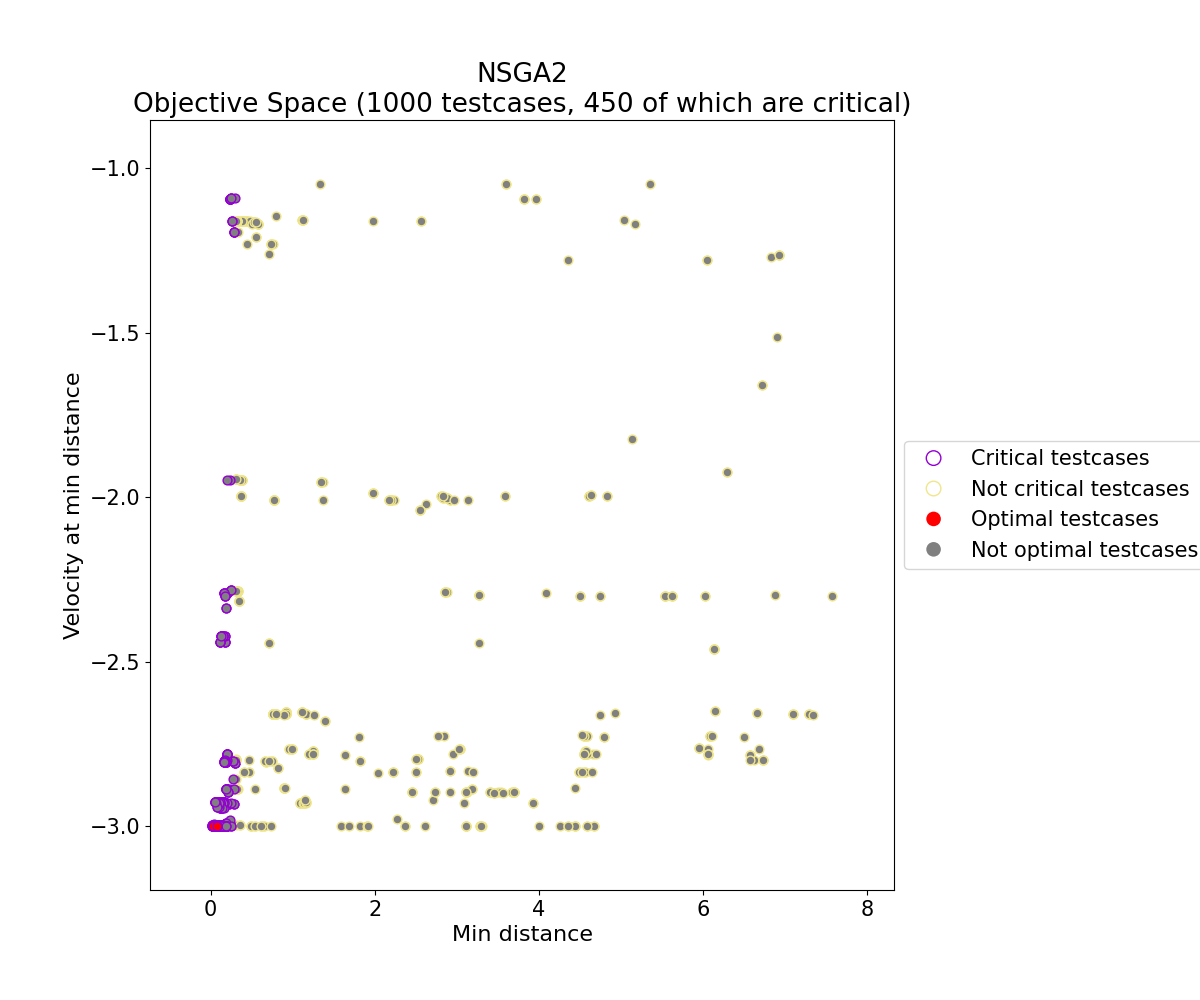

In [12]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "objective_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1    

**Note: In the fitness space plot the velocity is negative as the corresponding fitness functions are inverted and minimized internally by pymoo.**